<a href="https://colab.research.google.com/github/xanabatka/proekt/blob/main/final_ver_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ответственные и задачи:
* Якшибаев Д.Д. – начальный EDA и ресерч-анализ.
* Потеряйко Г.Е. – финальный EDA и ресерч-анализ.
* Торопицин А.И. – Feature Engineering и Feature Importances.
* Коробицын И.А. – эксперименты с двумя моделями машинного обучения.
* Толиков Н.Е. – оставшиеся эксперименты с моделями машинного/глубокого обучения.

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Читаем данные и смотрим первые 5 строк

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# EDA

Посмотрим какие столбцы есть в нашем датасете.

In [ ]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Опишем, что означает каждый столбец:
*   **Unnamed: 0** - id строк.
*   **track_id** - идентификатор трека. Состоит из цифр и латинских букв.
*   **artists** - имена артистов, работавших над песней, указываются через ";".
*   **album_name** - название альбома.
*   **track_name** - название трека.
*   **popularity** - индекс популярности песни, принимает значения от 0 до 100 включительно. Является таргетной переменной.
*   **duration_ms** - длина песни в миллисекундах.
*   **explicit** - Показывает присутствуют ли в треке откровенные темы или нецензурная брань. Если значение True - присутствует, False - не присутсвует.
*   **danceability** - показатель танцевальности песни. Принимает значение в виде десятичной дроби от 0 до 1.
*   **energy** - показатель энергичности песни. Принимает значение в виде десятичной дроби от 0 до 1.
*   **key** - тональность песни. Принимает значения 0 до 11 включительно.
*   **loudness** -  показатель громкости песни. Принимает значение в виде десятичной дроби.
*   **mode** - режим аудиозаписи. Принимает значения либо 0, либо 1.
*   **speechiness** - доля вокала или речевых элементов в треке. Принимает значение в виде десятичной дроби от 0 до 1.
*   **acousticness** - показатель звучания песни. Принимает значение в виде десятичной дроби от 0 до 1.
*   **instrumentalness** - показатель инструментальности песни. Принимает значение в виде десятичной дроби от 0 до 1.
*   **liveness** - показатель живости песни. Принимает значение в виде десятичной дроби от 0 до 1.
*   **valence** - показатель привлекательности песни для слуха. Принимает значение в виде десятичной дроби от 0 до 1.
*   **tempo** - темп песни, указыватся в ВРМ (удары в минуту). Принимает значение в виде десятичной дроби.
*   **time_signature** -  размер такта. Принимает значения от 0 до 4 включительно.
*   **track_genre** - жанр песни.


Как мы видим, столбцы "Unnamed: 0" и "track_id" не несут никакой полезной
информации, так как являются просто id, поэтому их можно смело убрать.

In [ ]:
data = data.drop(['Unnamed: 0', 'track_id'], axis = 1)
data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Смотрим информацию о датасете

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

В датасете 114000 строк. Имеется булевый признак(explicit), 4 категориальных(track_genre, track_name, album_name, artists), остальные признаки числовые.

Как мы видим, есть три столбца с пропущенным значением. Посмотрим, что это за строка (если она одна).

In [ ]:
data[data.isnull().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Оставлять такую строку не имеет особого смысла, поэтому удалим ее.

In [ ]:
data = data.dropna()

Для удобства переведем "duration_ms" в минуты и переименуем на "duration_min"

In [ ]:
data['duration_ms'] = round(data['duration_ms']/(1000*60), 1)
data = data.rename(columns = {'duration_ms' : 'duration_min'})

In [ ]:
data['duration_min']

,duration_min
0,3.8
1,2.5
2,3.5
3,3.4
4,3.3
...,...
113995,6.4
113996,6.4
113997,4.5
113998,4.7


Также для удобства переведем булево значение в числовое.

In [ ]:
data['explicit'] = data['explicit'].astype('int64')

In [ ]:
data['explicit']

,explicit
0,0
1,0
2,0
3,0
4,0
...,...
113995,0
113996,0
113997,0
113998,0


Построим корреляционную матрицу, чтобы посмотреть на взаимосвязь признаков.
Для этого преобразуем все признаки в числовые, используя LabelEncoder.


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

LE.fit(data['artists'].unique())
data['artists'] = LE.transform(data['artists'])

LE.fit(data['album_name'].unique())
data['album_name'] = LE.transform(data['album_name'])

LE.fit(data['track_name'].unique())
data['track_name'] = LE.transform(data['track_name'])

LE.fit(data['track_genre'].unique())
data['track_genre'] = LE.transform(data['track_genre'])

Строим саму матрицу.

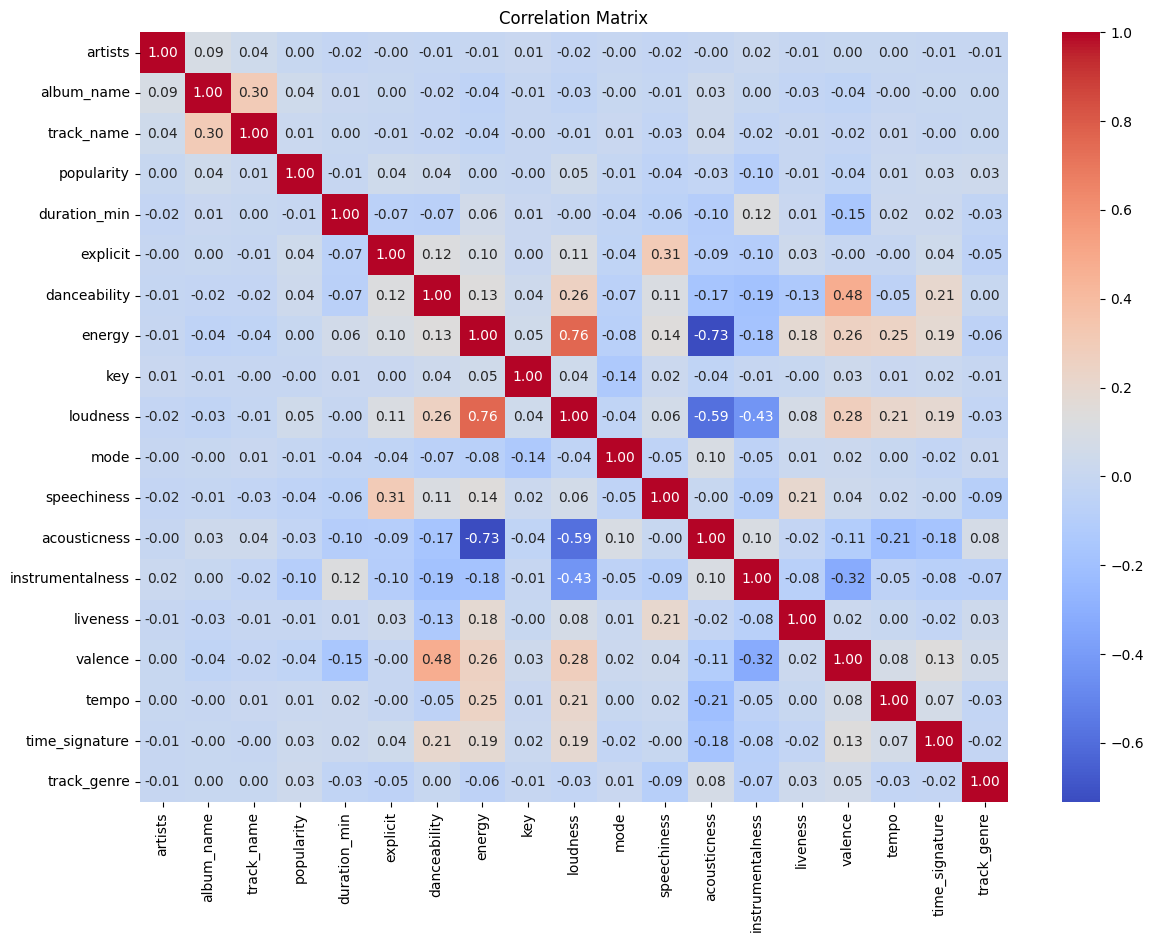

In [ ]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

Проанализируем матрицу корреляции:

*   Мы видим большую положительную корреляцию между **loudness** и **energy**, это может говорить о том, что чем громче музыка, тем она более энергична.
*   Также мы видим немалую положительную корреляцию между **danceability** и **valence**, что может говорить о том, что чем больше "танцевальность" музыки, тем она более приятная.
*   Корреляция между **speechiness** и **explicit** может свидетельствовать о
том, что наличие речевых элементов повышает шанс на наличие explicit-контента. Но так как корреляция умеренная, то высокий **speechiness** не обязательно означает наличие explicit-контента.
*   Сильная связь между **acousticness** и **energy** указывает на то, что акустические треки имеет низкую активность и интенсивность.
*   Связь между **acousticness** и **loudness** говорит о том, что с увеличением акустичности трека, его громкость становится меньше, но так как связь не абсолютная, то бывают и исключения.
*   Умеренная связь **instrumentalness** и **loudness** может свидетельствовать о том, что чем инструментальнее трек, тем ниже показатели громкости, но могут быть и жанры музыки, где ситуация другая.
*   Корреляция между **instrumentalness** и **valence**  говорит, что более инструментальные треки часто менее выразительные эмоционально, но это не всегда так.

Так же отдельно выведем корреляцию с таргетом.

In [ ]:
correlation_with_target = correlation_matrix['popularity'].sort_values(ascending=False)
correlation_with_target

,popularity
popularity,1.000000
loudness,0.050420
explicit,0.044078
album_name,0.042501
danceability,0.035444
track_genre,0.032696
time_signature,0.031076
tempo,0.013212
track_name,0.011935
artists,0.003636


Наибольшую положительную корреляцию имеют **loudness**, **explicit**, **danceability**. Отрицательную - **instrumentalness**, **speechiness**, **valence**.


Как можно увидеть, корреляции достаточно слабые. Это говорит о том, что данные признаки оказывают ограниченное влияние на популярность треков, а также, что на нее влияет множество других факторов (например, реклама, лейбл, соц. сети и многое другое).

Из анализа матрицы корреляций стало понятно, что у нас имеется сильная отрицательная корреляция между **acousticness** и **energy** (-0.73) и
сильная положительная корреляция между **loudness** и **energy** (0.76). Так как эти признаки несут излишнюю информацию, позже можно на их основе создать два новых.



---

---






Посмотрим как меняется популярность песни в зависимости от ее длительности

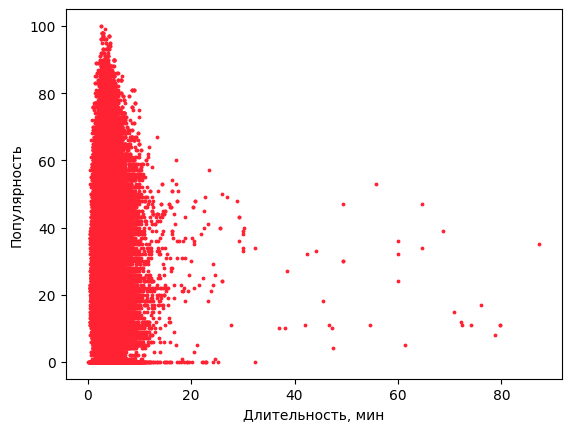

In [ ]:
plt.scatter(data['duration_min'], data['popularity'], s=3, color='#ff2233')
plt.xlabel('Длительность, мин')
plt.ylabel('Популярность')
plt.show()

Как мы видим большинство популярных треков находится в пределах от 0 до 10 минут, что логично, так как в целом не так много треков длительностью больше 10 минут.

Теперь рассмотрим поближе распределение треков по популярности в пределах от 0 до 10 минут.

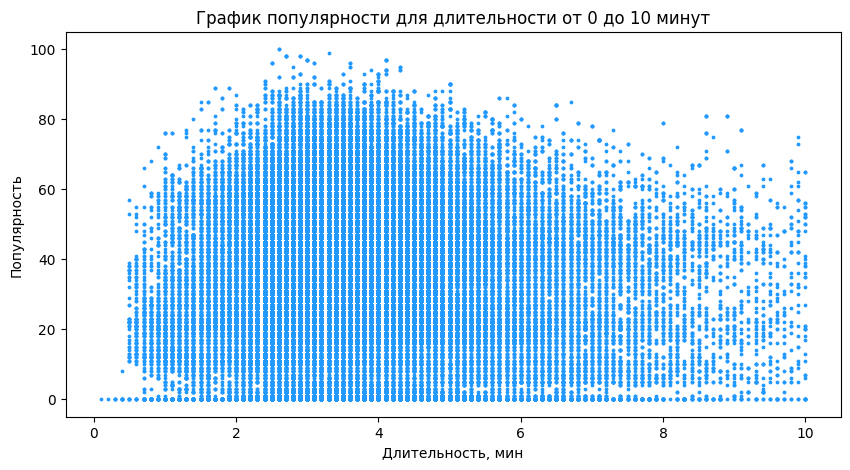

In [ ]:
data_filtered = data[(data['duration_min'] >= 0) & (data['duration_min'] <= 10)]

plt.figure(figsize=(10, 5))
plt.scatter(data_filtered['duration_min'], data_filtered['popularity'], s=3, color='#2299ff')
plt.xlabel('Длительность, мин')
plt.ylabel('Популярность')
plt.title('График популярности для длительности от 0 до 10 минут')
plt.show()

Как видно по графику наиболее популярные треки находятся в диапазоне от 2 до 5 минут. В целом, большинство треков находится в этом диапазоне, из чего можно сделать вывод, что это самая оптимальная длительность для большинства людей.



---



Теперь рассмотрим какие 5 жанров самые/менее популярны

Прочитаем данные еще раз, так как мы перевели все данные в числовые.

In [ ]:
data1 = pd.read_csv('dataset.csv')
top_genres = data1.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5)

Рассмотрим график с 5-ю самыми популярными жанрами.

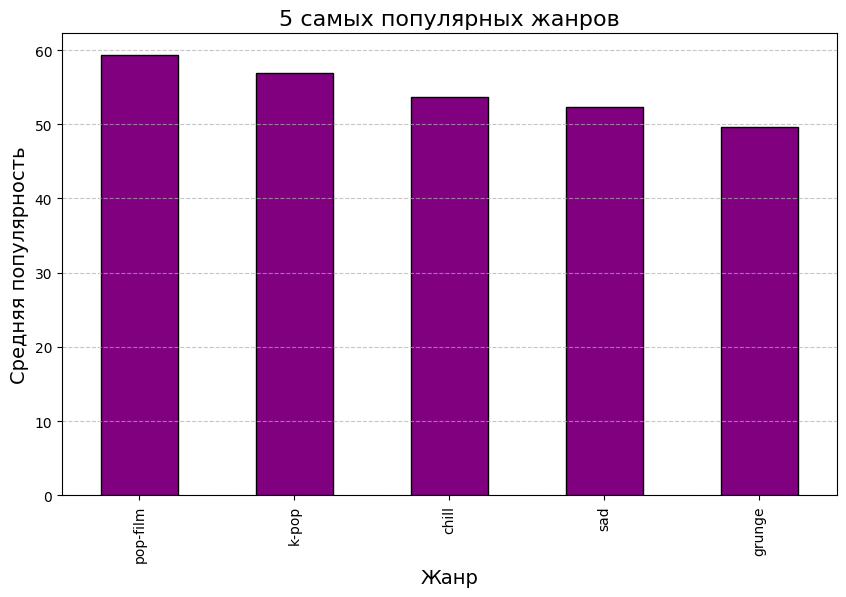

In [ ]:
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='purple', edgecolor='black')
plt.title('5 самых популярных жанров', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#выведем значение средней популярности этих жанров
top_genres

,popularity
track_genre,
pop-film,59.283
k-pop,56.896
chill,53.651
sad,52.379
grunge,49.594


Как видим, более популярными являются жанры связанные с массовой культурой(pop-film, k-pop), так же высокое место по популярности занимают "повседневные" треки (chill, sad). Можно заметить, что даже жанры с узкой целевой аудиторией могут быть популярны (grunge).

Теперь найдем 5 наименее популярных жанра

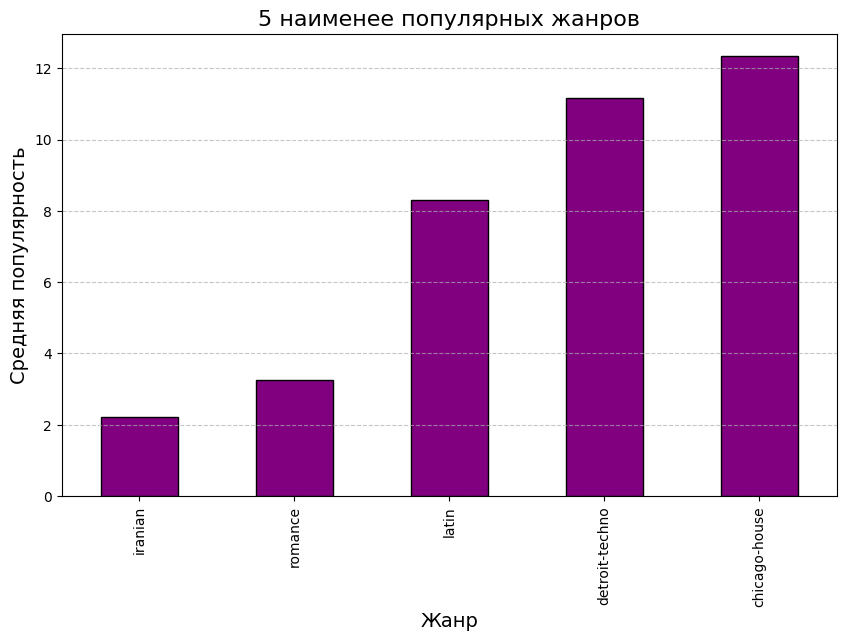

In [ ]:
least_pop_genres = data1.groupby('track_genre')['popularity'].mean().sort_values(ascending=True).head(5)


plt.figure(figsize=(10, 6))
least_pop_genres.plot(kind='bar', color='purple', edgecolor='black')
plt.title('5 наименее популярных жанров', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#выведем значение средней популярности этих жанров
least_pop_genres

,popularity
track_genre,
iranian,2.210
romance,3.245
latin,8.297
detroit-techno,11.174
chicago-house,12.339


Наименее популярными являются жанры со специфическим культурным контекстом, это может быть связано как с узким охватом аудитории, так и с малой доступностью на современных муз. площадках. Так же не очень популярны электронные жанры, что объясняется их узкой направленностью и нишевостью.



---



Рассмотрим зависит ли популярность трека от длины его названия, от длины названия альбома.

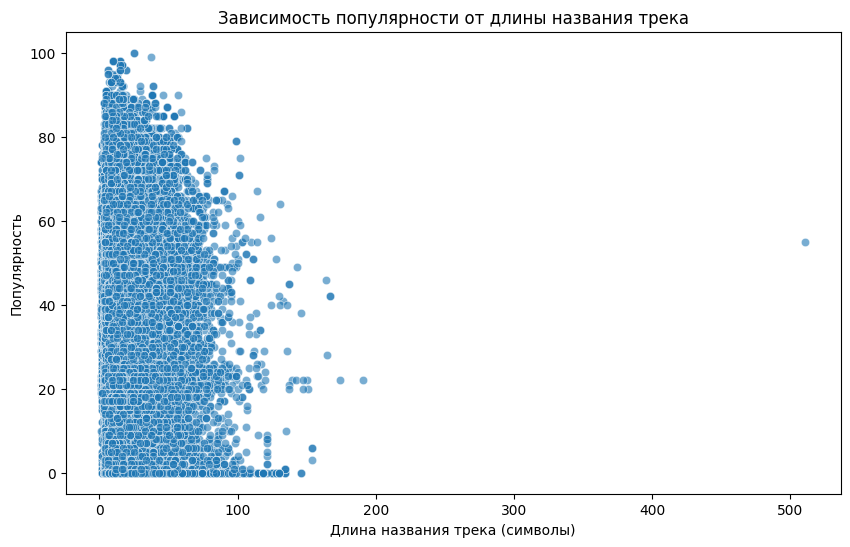

In [ ]:
data1['track_name_length'] = data1['track_name'].str.len()
data1['album_name_length'] = data1['album_name'].str.len()

#создаем график от длины названия трека
plt.figure(figsize=(10, 6))
sns.scatterplot(x='track_name_length', y='popularity', data=data1, alpha=0.6)
plt.title('Зависимость популярности от длины названия трека')
plt.xlabel('Длина названия трека (символы)')
plt.ylabel('Популярность')
plt.show()

Из графика видно, что большинство треков имеют длину названия меньше 100, и более популярны треки с длиной названия примерно меньше 50.

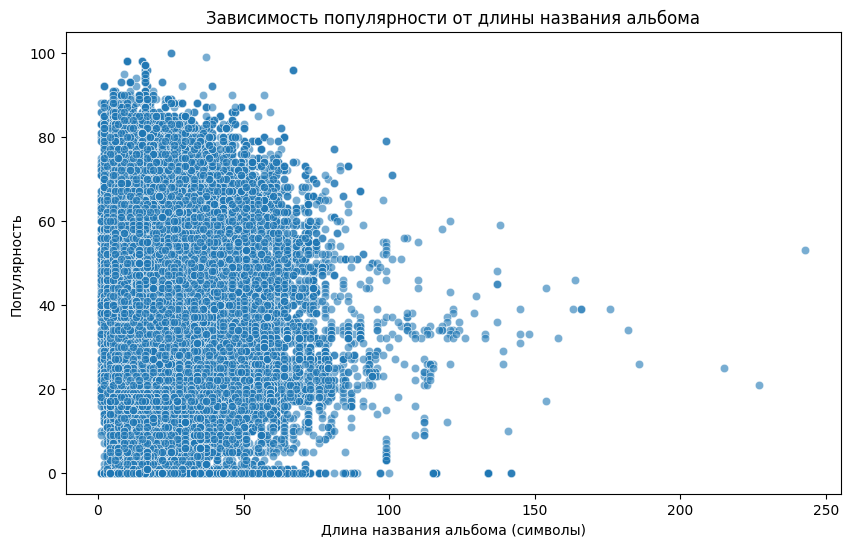

In [ ]:
#создаем график от длины названия альбома
plt.figure(figsize=(10, 6))
sns.scatterplot(x='album_name_length', y='popularity', data=data1, alpha=0.6)
plt.title('Зависимость популярности от длины названия альбома')
plt.xlabel('Длина названия альбома (символы)')
plt.ylabel('Популярность')
plt.show()

По графику видно, что короткие названия более популярные, но разница с более длинными(до 50 символов) не особо большая. У большинства альбомов названия содержат либо меньше 50 символов, либо чуть больше.



---



Можно рассмотреть зависит ли популярность от наличия explicit-контента.

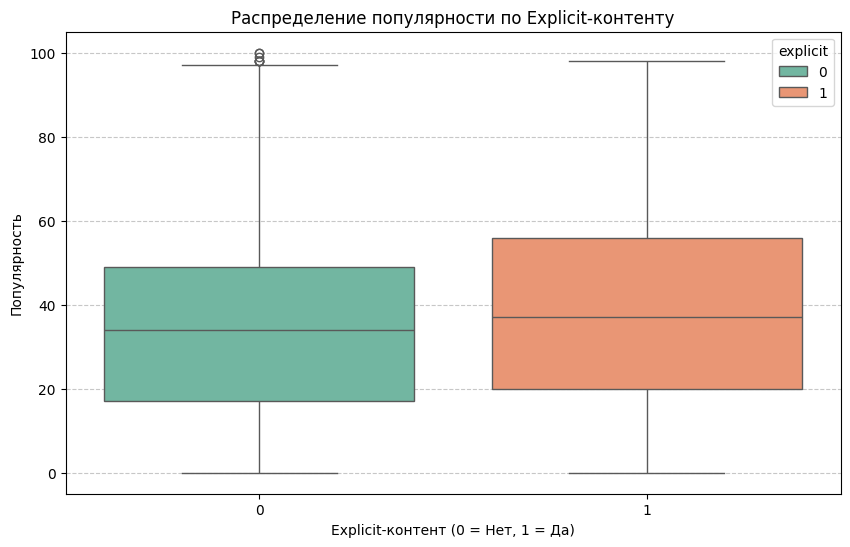

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='explicit', y='popularity', data=data, palette='Set2', hue='explicit', dodge=False, )
plt.xlabel('Explicit-контент (0 = Нет, 1 = Да)')
plt.ylabel('Популярность')
plt.title('Распределение популярности по Explicit-контенту')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Как видно из графика треки с наличием Explicit-контента популярнее тех, где его нет, но разница не слишком велика. Также можно заметить выбросы, указывающие на чрезвычайно популярные треки, особенно среди треков без Explicit-контента.



---



Рассмотрим зависит ли популярность от инструментальности трека

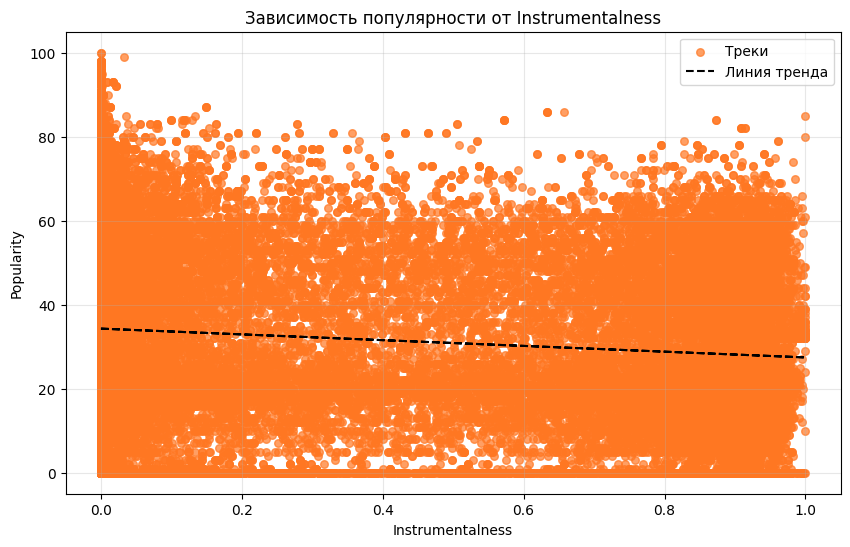

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['instrumentalness'], data['popularity'], s=30, color='#ff7722', alpha=0.7, label='Треки')
plt.plot(
    data['instrumentalness'],
    np.poly1d(np.polyfit(data['instrumentalness'], data['popularity'], 1))(data['instrumentalness']),
    color='black', linestyle='--', label='Линия тренда'
)
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Зависимость популярности от Instrumentalness')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Как можно увидеть по графику, с увеличением инструментальности музыки ее популярность уменьшается. Но на таком графике сложно увидеть, в каких диапазонах изменение инструментальности влияет на популярность. Для этого построим более удобный для этого график.

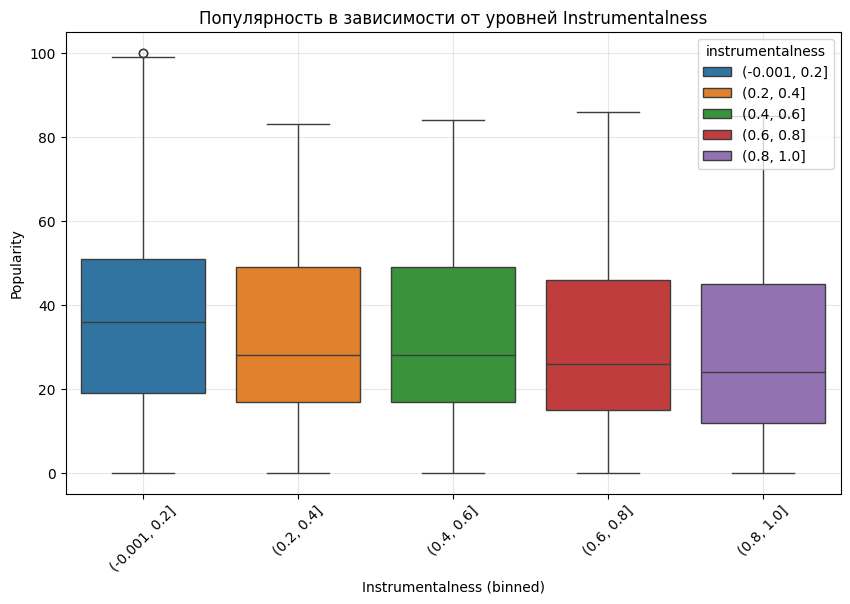

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=pd.cut(data['instrumentalness'], bins=5),
    y=data['popularity'],
    hue=pd.cut(data['instrumentalness'], bins=5),
    dodge=False
)
plt.xlabel('Instrumentalness (binned)')
plt.ylabel('Popularity')
plt.title('Популярность в зависимости от уровней Instrumentalness')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

Здесь заметно, что наибольшая популярность находится в диапазоне от 0 до 0.2. Далее уменьшается, но в диапазоне от 0.2 до 0.6 держится примерно на одном уровне. А при значениях больше 0.6 продолжает уменьшаться.



---



Посмотрим существует ли зависимость популярности от наличия в названии трека ключевых слов(remix, feat, live).

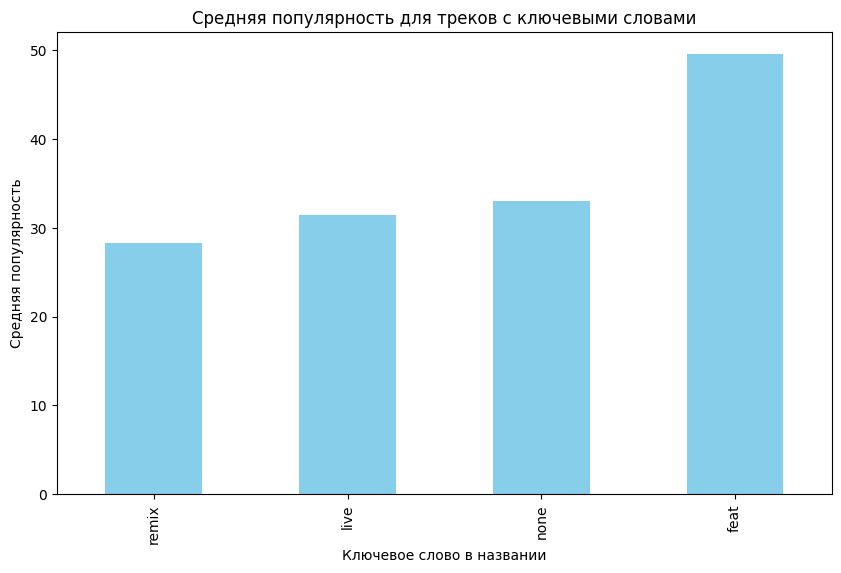

In [ ]:
def find_keyword(name, keywords):
    for keyword in keywords:
        if keyword in name.lower():
            return keyword
    return 'none'


keywords = ['remix', 'feat', 'live']
data1['keyword_in_title'] = data1['track_name'].apply(lambda x: find_keyword(str(x), keywords))


mean_popularity_keywords = data1.groupby('keyword_in_title')['popularity'].mean().sort_values()
mean_popularity_keywords.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Средняя популярность для треков с ключевыми словами')
plt.xlabel('Ключевое слово в названии')
plt.ylabel('Средняя популярность')
plt.show()

Как можно увидеть фиты более популярные, чем обычные треки, что вполне объяснимо, так как происходит объединение нескольких аудиторий. Другие же ключевые слова не показали особых отличий от треков, где их нет, а даже оказались в среднем менее популярны.

Выводы по EDA:


*   У наиболее популярных треков длительность занимает примерное от 2 до 5 минут.
*   Наиболее популярные жанры: pop-film, k-pop, chill. Наименее: iranian, romance, latin.
*   Треки с пометкой Explicit, популярнее треков без нее, но не сильно.
*   Чем более инструментальный трек, тем менее он популярен. У треков с инструментальностью от 0 до 0.2 наибольшая популярность.
*   Музыкальные характеристики слабо коррелируют с популярностью.
*   loudness и energy, acousticness и energy сильно коррелируют между собой.
*   Треки и альбомы с короткими названиями более популярны, но у альбомов разница не такая заметная.
*   Фиты более популярны, чем обычные треки.


# Создание новых признаков

Из выводов, которые были сделаны выше, мы имеем 2 пары признаков имеющих сильную корреляцию, сделаем первые два признака на их основе.

Первый из них это **intensity_score**, который будет показывать суммарную интенсивность.

In [ ]:
data['intensity_score'] = data['loudness'] * data['energy']

Второй - **acousticness_energy_interaction**, будет показывать взаимодействие между акустичностью и энергией, умножая акустичность на (1 - энергия).

In [ ]:
data['acousticness_energy_interaction'] = data['acousticness'] * (1 - data['energy'])

Попробуем объединить признаки, которые связаны друг с другом по смыслу. Создадим третий признак **overall_attraction**, который будет показывать общую привлекательность трека.

In [ ]:
data['overall_attraction'] = data['valence'] * data['energy'] * data['danceability']

На основе анализа, что меньшая длина названия, способствует популярности, создадим четвертый признак **track_name_length**, показывающий количество символов в названии трека.

In [ ]:
data1.dropna()
data['track_name_length'] = data1['track_name'].str.len()

Как было проанализировано выше, треки со словом "feat" имеют большую популярность, поэтому создадим пятый признак **has_feat**, показывающий наличие слова feat в названии.

In [ ]:
data['has_feat'] = data1['track_name'].str.contains('feat', case=False, na=False).astype(int)

Удалим признаки loudness, energy, acousticness, так как они имеют сильную корреляцию между друг другом и из-за этого дают избыточную информацию.

In [ ]:
data = data.drop(['loudness', 'energy', 'acousticness'], axis = 1)
data.head()

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,key,mode,speechiness,...,liveness,valence,tempo,time_signature,track_genre,intensity_score,acousticness_energy_interaction,overall_attraction,track_name_length,has_feat
0,10357,8100,11741,73,3.8,0,0.676,1,0,0.1430,...,0.3580,0.715,87.917,4,0,-3.109906,0.017356,0.222820,6.0,0
1,3287,14796,22528,55,2.5,0,0.420,1,1,0.0763,...,0.1010,0.267,77.489,4,0,-2.861010,0.770616,0.018615,16.0,0
2,12397,39162,60774,57,3.5,0,0.438,0,1,0.0557,...,0.1170,0.120,76.332,4,0,-3.494506,0.134610,0.018869,14.0,0
3,14839,8580,9580,71,3.4,0,0.266,0,1,0.0363,...,0.1320,0.143,181.740,3,0,-1.103494,0.851062,0.002267,26.0,0
4,5255,16899,25689,82,3.3,0,0.618,2,1,0.0526,...,0.0829,0.167,119.949,4,0,-4.288683,0.261233,0.045720,7.0,0


Корреляция новых признаков с таргетом. Посмотрим корреляцию между **intensity_score**, **acousticness_energy_interaction**, **overall_attraction**, **track_name_length**, **has_feat** и **popularity**.


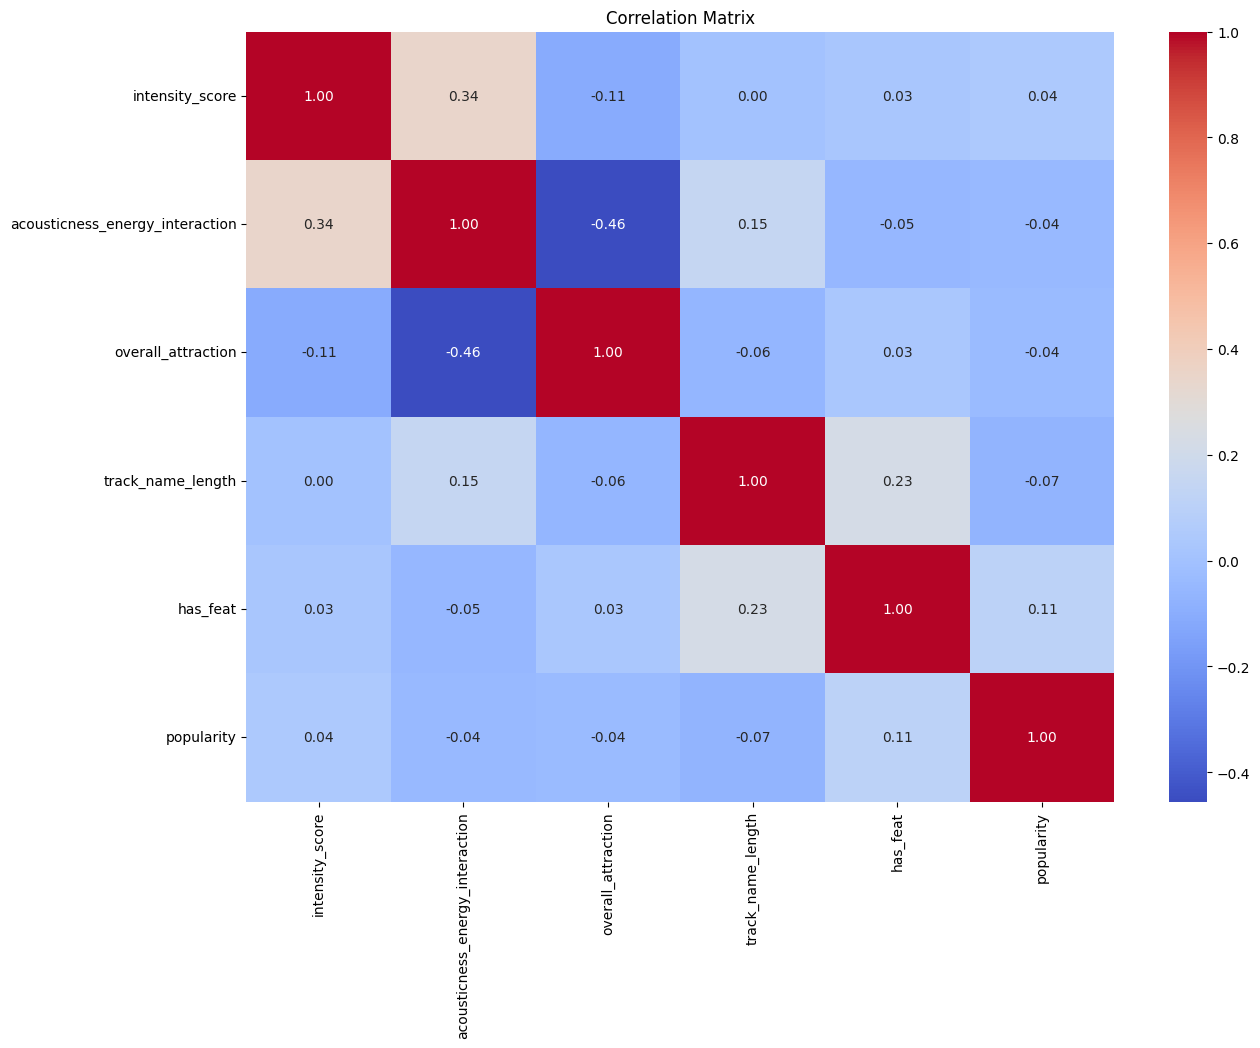

In [ ]:
new_features = data.loc[:, ['intensity_score', 'acousticness_energy_interaction', 'overall_attraction', 'track_name_length', 'has_feat', 'popularity']]

plt.figure(figsize=(14, 10))
correlation_matrix = new_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

Заметим, что **intensity_score** и **acousticness_energy_interaction** имеет связь между собой, хоть и слабую. **overall_attraction** и **acousticness_energy_interaction** имеют умеренную отрицательную корреляцию между собой, это может указывать на противоположное влияние этих характеристик на восприятие трека. Остальные признаки имеют довольно слабую связь друг с другом.

Отдельно покажем корреляцию между популярностью и остальными признаками.

In [ ]:
correlation_matrix['popularity'].sort_values(ascending=False)

,popularity
popularity,1.000000
has_feat,0.111150
intensity_score,0.040456
overall_attraction,-0.035955
acousticness_energy_interaction,-0.043160
track_name_length,-0.070627


Мы видим слабую корреляцию между признаками и популярностью. Это может означать, что популярность зависит от более сложных признаков, или от внешних признаков, которые не учтены. Самую большую корреляцию имеет признак **has_feat**, хоть она и остается слабой.

# Обучение на простой модели. Feature Importance

Для того, чтобы обучить модель, надо сначала привести данные в подходящий вид. Так как мы уже преобразовали все нечисловые признаки в таковые, осталость только нормализовать оставшиеся.

In [ ]:
data.head()

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,key,mode,speechiness,...,liveness,valence,tempo,time_signature,track_genre,intensity_score,acousticness_energy_interaction,overall_attraction,track_name_length,has_feat
0,10357,8100,11741,73,3.8,0,0.676,1,0,0.1430,...,0.3580,0.715,87.917,4,0,-3.109906,0.017356,0.222820,6.0,0
1,3287,14796,22528,55,2.5,0,0.420,1,1,0.0763,...,0.1010,0.267,77.489,4,0,-2.861010,0.770616,0.018615,16.0,0
2,12397,39162,60774,57,3.5,0,0.438,0,1,0.0557,...,0.1170,0.120,76.332,4,0,-3.494506,0.134610,0.018869,14.0,0
3,14839,8580,9580,71,3.4,0,0.266,0,1,0.0363,...,0.1320,0.143,181.740,3,0,-1.103494,0.851062,0.002267,26.0,0
4,5255,16899,25689,82,3.3,0,0.618,2,1,0.0526,...,0.0829,0.167,119.949,4,0,-4.288683,0.261233,0.045720,7.0,0


Как мы видим нормализовать надо три признака: **tempo**, **intensity_score** и **track_name_length**. Для этого используем MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[['tempo', 'intensity_score', 'track_name_length']])
data[['tempo', 'intensity_score', 'track_name_length']] = normalized_data

Проверим нормализованные данные

In [ ]:
data[['tempo', 'intensity_score', 'track_name_length']]

,tempo,intensity_score,track_name_length
0,0.361245,0.800182,0.009804
1,0.318397,0.806694,0.029412
2,0.313643,0.790120,0.025490
3,0.746758,0.852676,0.049020
4,0.492863,0.769341,0.011765
...,...,...,...
113995,0.517705,0.780757,0.035294
113996,0.350242,0.825474,0.029412
113997,0.543933,0.787766,0.025490
113998,0.558651,0.737392,0.011765


Как видно, теперь все значения находятся в диапазоне от 0 до 1. Нормализация прошла успешно.

Далее разделим наш датасет на фичи и таргет. А затем разделим их на обучающую и тестовую выборки, соотношение будет 80 к 20.

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop('popularity', axis = 1)
y = data['popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Теперь создадим простую модель. Будем делать модель полносвязной нейронной связи. Сначала необходимо заскейлить сами данные.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Теперь создадим саму модель, которая будет состоять из трех слоев. Оптимизатором будет - Adam, а метрика - MSE(средняя квадратичная ошибка).

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Input(shape=(x_train.shape[1], )),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mean_squared_error')

Теперь обучим модель и найдем loss

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

loss = model.evaluate(x_test, y_test)
print(f'Loss: {loss}')

Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 624.6113 - val_loss: 457.6835
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 460.5068 - val_loss: 445.1011
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 446.6063 - val_loss: 438.5586
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 442.2116 - val_loss: 436.2593
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 433.9561 - val_loss: 429.6205
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 431.2224 - val_loss: 426.7832
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 428.2990 - val_loss: 425.5888
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 424.3655 - val_loss: 422.2694
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 419.1642 - val_loss: 418.7130
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 416.9427 - val_loss: 417.2950
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 420.2281
Loss: 422.427947998

Изобразим график изменения loss

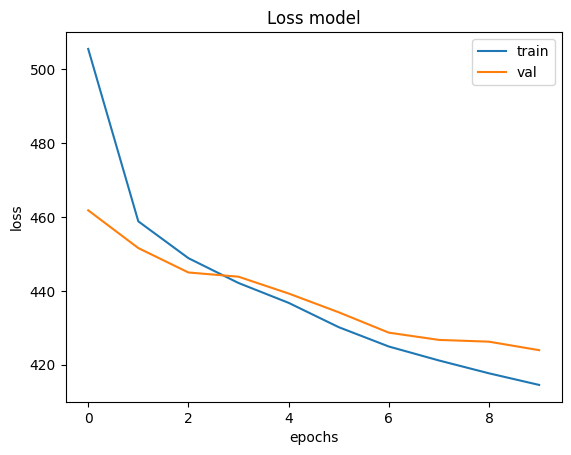

In [ ]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Loss model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Как видно по графику сначала идет резкое падение loss, но затем с увеличением эпохи loss уменьшается более гладко, но все еще находится на довольно высоком уровне.

Попробуем спрогнозировать от этой модели и получить метрики:


*   MSE - средняя квадратичная ошибка.
*   RMSE - корень из средней квадротичной ошибки.
*   MAE - средняя абсолютная ошибка.



In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_score}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE: 422.4280779752714
RMSE: 20.553055198078738
MAE: 16.634503488366803
R^2: 0.15084415674209595


Как можно увидеть значения ошибок получились относительно большими, что говорит о том, что модель требует улучшения.



Теперь проведем **feature importance**, чтобы выявить, что больше всего влияет на loss. Сделаем это при помощи Permutation Importance (он измеряет влияние каждого признака на качество модели путем случайной перестановки значений этого признака в данных).

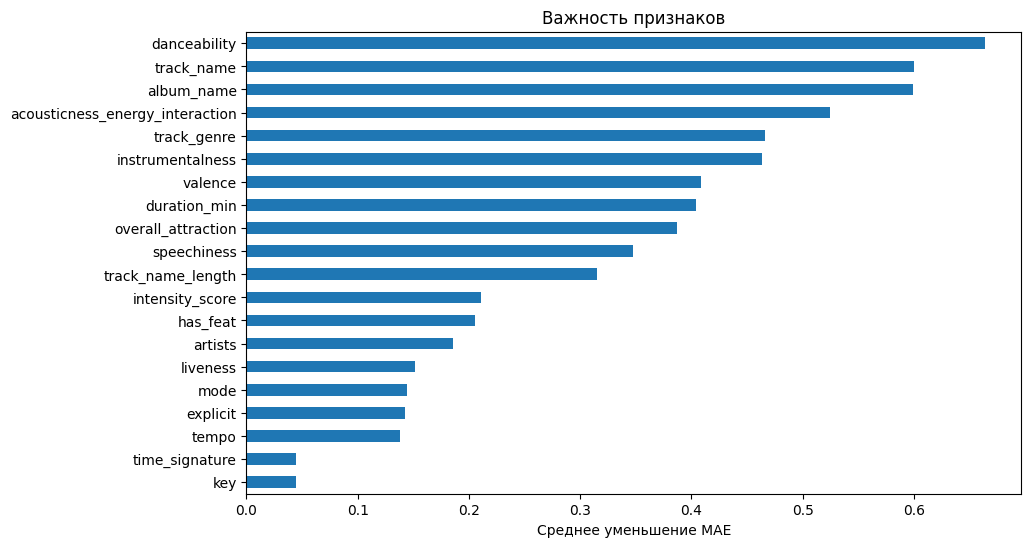

In [ ]:
from sklearn.inspection import permutation_importance
from contextlib import redirect_stdout
import io


with redirect_stdout(io.StringIO()):
    res = permutation_importance(model, x_test, y_test, n_repeats=10, scoring='neg_mean_absolute_error')


importances = pd.Series(res.importances_mean, index = x.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Из графика можно сделать следующие выводы:


*   **Danceability** сильнее всего влияет на среднее уменьшение MAE
*   Очень хорошо показал себя новый признак **acousticness_energy_interaction** и довольно неплохо **overall_attraction**.
*   Также довольно хорошие показатели у признаков: **instrumentalness**, **track_genre**, **duration_min**.
*   Наименьшее среднее уменьшение MAE имеет признак **key**.
*   Также имеют малую важность другие признаки: **time_signature**, **tempo**, **explicit**.
*   Слабо показали себя другие новые признаки **intensity_score** и **has_feat**.
*   Средне показал себя новый признак **track_name_length**.



# Эксперименты с моделями

Для начала удалим не самые важные на первый взгляд признаки, такие как **time_signature** и **key**. И снова разделим выборку на две части: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

data_exp = data.drop(['time_signature', 'key'], axis = 1)

X = data_exp.drop('popularity', axis = 1)
Y = data_exp['popularity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

В качестве моделей будем использовать:


*   LinearRegression (Ridge)
*   RandomForestRegressor
*   GradientBoostingRegressor
*   Нейронную сеть



---



Начнем с **LinearRegression**. Используем кросс-валидацию с 5 фолдами. Пока что запустим голую модель, гиперпараметры подберем потом.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

cv_mae_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring=mae_scorer)
cv_mse_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring=mse_scorer)
cv_r2_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring=r2_scorer)

mean_mae = -cv_mae_scores.mean()
std_mae = cv_mae_scores.std()
lr_mae = -cv_mae_scores.mean()

lr_mean_mse = -cv_mse_scores.mean()
std_mse = cv_mse_scores.std()

lr_mean_rmse = np.sqrt(-cv_mse_scores.mean())
std_rmse = np.sqrt(cv_mse_scores.std())

lr_mean_r2 = cv_r2_scores.mean()
std_r2 = cv_r2_scores.std()

print(f"Средняя MAE: {lr_mae:.4f}, Стандартное отклонение MAE: {std_mae:.4f}")
print(f"Средняя MSE: {lr_mean_mse:.4f}, Стандартное отклонение MSE: {std_mse:.4f}")
print(f"Средняя RMSE: {lr_mean_rmse:.4f}, Стандартное отклонение RMSE: {std_rmse:.4f}")
print(f"Средний R^2: {lr_mean_r2:.4f}, Стандартное отклонение R^2: {std_r2:.4f}")

Средняя MAE: 18.1226, Стандартное отклонение MAE: 0.0520
Средняя MSE: 474.3265, Стандартное отклонение MSE: 1.9101
Средняя RMSE: 21.7790, Стандартное отклонение RMSE: 1.3821
Средний R^2: 0.0472, Стандартное отклонение R^2: 0.0032


Как мы видим средние ошибки велики, что было вполне ожидаемо, а средняя R2 очень маленькая.

Теперь подберем гиперпараметры с помощью optuna. Для начала установим ее.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.6 MB/s eta 0:00:00


Подбираем гиперпараметры. Так как у LinearRegression нет гиперпарметров, будем использовать Ridge. Подбор будем делать по уменьшению MAE.

In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-3, 1.0, log=True)
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept, max_iter=1000)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = -cross_val_score(
        model, X_train_scaled, Y_train, cv=kf, scoring="neg_mean_absolute_error"
    )

    return mae_scores.mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Лучшие гиперпараметры:", study.best_params)
print("Минимальная MAE:", study.best_value)

[I 2024-12-07 10:26:51,272] A new study created in memory with name: no-name-11055e36-3b88-4776-b42c-053d2e4e1b34
[I 2024-12-07 10:26:51,607] Trial 0 finished with value: 18.122587239838623 and parameters: {'alpha': 0.005560084359650663, 'fit_intercept': True}. Best is trial 0 with value: 18.122587239838623.
[I 2024-12-07 10:26:52,000] Trial 1 finished with value: 33.74019212302231 and parameters: {'alpha': 0.17330042575351046, 'fit_intercept': False}. Best is trial 0 with value: 18.122587239838623.
[I 2024-12-07 10:26:52,311] Trial 2 finished with value: 18.122588040606953 and parameters: {'alpha': 0.13235709406330878, 'fit_intercept': True}. Best is trial 0 with value: 18.122587239838623.
[I 2024-12-07 10:26:52,729] Trial 3 finished with value: 18.12259032127287 and parameters: {'alpha': 0.4934900575478329, 'fit_intercept': True}. Best is trial 0 with value: 18.122587239838623.
[I 2024-12-07 10:26:53,168] Trial 4 finished with value: 33.74019364193467 and parameters: {'alpha': 0.0026

Лучшие гиперпараметры: {'alpha': 0.0010348243886880147, 'fit_intercept': True}
Минимальная MAE: 18.122587211259933


Результат не особо удовлетворителен. Попробуем увеличить количество и диапозон гиперпараметров.

In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-5, 10.0, log=True)
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = trial.suggest_categorical("solver", ["auto", "lsqr", "sparse_cg", "sag", "saga"])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept, solver=solver, max_iter=5000)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = -cross_val_score(
        model, X_train_scaled, Y_train, cv=kf, scoring="neg_mean_absolute_error"
    )

    return mae_scores.mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Лучшие гиперпараметры:", study.best_params)
print("Минимальная MAE:", study.best_value)

[I 2024-11-21 07:21:21,344] A new study created in memory with name: no-name-430c5a6b-45c2-4695-8b97-393f0d1d999d
[I 2024-11-21 07:21:26,303] Trial 0 finished with value: 18.12258980387789 and parameters: {'alpha': 0.00518388746630797, 'fit_intercept': True, 'solver': 'saga'}. Best is trial 0 with value: 18.12258980387789.
[I 2024-11-21 07:21:26,640] Trial 1 finished with value: 18.12259015622932 and parameters: {'alpha': 0.4673560325710954, 'fit_intercept': True, 'solver': 'auto'}. Best is trial 0 with value: 18.12258980387789.
[I 2024-11-21 07:21:27,035] Trial 2 finished with value: 18.12264202492249 and parameters: {'alpha': 0.0003702511057404438, 'fit_intercept': True, 'solver': 'lsqr'}. Best is trial 0 with value: 18.12258980387789.
[I 2024-11-21 07:21:30,224] Trial 3 finished with value: 18.12258456862175 and parameters: {'alpha': 0.0023980591514401127, 'fit_intercept': True, 'solver': 'sag'}. Best is trial 3 with value: 18.12258456862175.
[I 2024-11-21 07:21:33,332] Trial 4 fini

Лучшие гиперпараметры: {'alpha': 0.026235741243726685, 'fit_intercept': True, 'solver': 'sag'}
Минимальная MAE: 18.12258104456634


Даже с подбором гиперпараметров значение MAE не особо изменилось, так что не вижу необходимости проверять модель с гиперпараметрами. В целом, такие значения для линейной регрессии логичны, так как у нас очень слабая линейная корреляция признаков с таргетной переменной, также такие высокие значения ошибок могут быть связаны с недостаточной информативностью признаков.



---



Теперь попробуем использовать модель **RandomForestRegressor**



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

mae_scores = -cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='r2')

rf_mae = mae_scores.mean()
rf_mse = mse_scores.mean()
rf_rmse = rmse_scores.mean()
rf_r2 = r2_scores.mean()

print(f"Средняя MAE на 5 фолдах: {rf_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {rf_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {rf_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {rf_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores.std():.4f}")

Средняя MAE на 5 фолдах: 10.8214
Средняя MSE на 5 фолдах: 211.6248
Средняя RMSE на 5 фолдах: 14.5470
Средний R2 на 5 фолдах: 0.5749
Стандартное отклонение MAE: 0.0873
Стандартное отклонение MSE: 2.9560
Стандартное отклонение RMSE: 0.1012
Стандартное отклонение R2: 0.0048


Как мы видим, ошибки меньше чем на линейной регрессии, что обусловлено более сложной и гибкой моделью. Значение ошибок довольно умеренное, как и значение r2, так что попробуем оптимизировать гиперпараметры.

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 70, 130)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    return -np.mean(scores)

study = optuna.create_study(direction='minimize', study_name='RandomForest Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)

[I 2024-11-21 20:06:37,017] A new study created in memory with name: RandomForest Optimization
[I 2024-11-21 20:13:20,606] Trial 0 finished with value: 12.084735253629 and parameters: {'n_estimators': 81, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 12.084735253629.
[I 2024-11-21 20:22:01,685] Trial 1 finished with value: 12.474062879273916 and parameters: {'n_estimators': 107, 'max_depth': 34, 'min_samples_split': 20, 'min_samples_leaf': 10}. Best is trial 0 with value: 12.084735253629.
[I 2024-11-21 20:31:30,881] Trial 2 finished with value: 12.1367931321101 and parameters: {'n_estimators': 127, 'max_depth': 25, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 0 with value: 12.084735253629.
[I 2024-11-21 20:38:32,696] Trial 3 finished with value: 12.343343373875966 and parameters: {'n_estimators': 99, 'max_depth': 38, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 0 with value: 12.084735253629.
[I 2024-11-2

Поиск параметров идет достаточно большое время, попробуем убрать кросс-валидацию и запустить подбор без нее.

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 70, 130)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, Y_train)

    y_pred = rf.predict(X_test)

    error = mean_absolute_error(Y_test, y_pred)
    return error

study = optuna.create_study(direction='minimize', study_name='RandomForest Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее значение MAE на валидационной выборке:", study.best_value)

[I 2024-12-07 13:39:43,103] A new study created in memory with name: RandomForest Optimization
[I 2024-12-07 13:41:35,600] Trial 0 finished with value: 12.80879139646647 and parameters: {'n_estimators': 86, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 12.80879139646647.
[I 2024-12-07 13:44:40,978] Trial 1 finished with value: 11.539653517704547 and parameters: {'n_estimators': 122, 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 1 with value: 11.539653517704547.
[I 2024-12-07 13:45:31,538] Trial 2 finished with value: 17.539673880313547 and parameters: {'n_estimators': 93, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 1 with value: 11.539653517704547.
[I 2024-12-07 13:48:53,869] Trial 3 finished with value: 11.62921230516002 and parameters: {'n_estimators': 114, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 1 with value: 11.539653517704547.
[I

Лучшие гиперпараметры: {'n_estimators': 115, 'max_depth': 23, 'min_samples_split': 12, 'min_samples_leaf': 3}
Лучшее значение MAE на валидационной выборке: 11.472981043198942


Попробуем увеличить количество и диапазон гиперпараметров

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, Y_train)

    y_pred = rf.predict(X_test)
    error = mean_absolute_error(Y_test, y_pred)

    return error

study = optuna.create_study(direction='minimize', study_name='RandomForest Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее значение MAE на тестовой выборке:", study.best_value)

[I 2024-12-07 14:24:22,006] A new study created in memory with name: RandomForest Optimization
[I 2024-12-07 14:24:48,201] Trial 0 finished with value: 13.396477500000568 and parameters: {'n_estimators': 53, 'max_depth': 19, 'min_samples_split': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 13.396477500000568.
[I 2024-12-07 14:32:46,369] Trial 1 finished with value: 13.311599985644586 and parameters: {'n_estimators': 198, 'max_depth': 51, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 13.311599985644586.
[I 2024-12-07 14:38:51,297] Trial 2 finished with value: 13.444012454785083 and parameters: {'n_estimators': 163, 'max_depth': 82, 'min_samples_split': 23, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 13.311599985644586.
[I 2024-12-07 14:41:26,207] Trial 3 finished with value: 13.445636248619126 and parameters: {'

Лучшие гиперпараметры: {'n_estimators': 86, 'max_depth': 59, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}
Лучшее значение MAE на тестовой выборке: 11.79549393041168


Поиск оптимальных гиперпараметров не привел к успеху, среднюю ошибку не удалось уменьшить, поэтому будем использовать первоначальную версию модели для сравнения с другими.



---



Теперь создадим модель **GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

mae_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse_scores_gbr = np.sqrt(mse_scores_gbr)
r2_scores_gbr = cross_val_score(gbr, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)

gbr_mae = mae_scores_gbr.mean()
gbr_mse = mse_scores_gbr.mean()
gbr_rmse = rmse_scores_gbr.mean()
gbr_r2 = r2_scores_gbr.mean()

print("\nGradientBoostingRegressor")
print(f"Средняя MAE на 5 фолдах: {gbr_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {gbr_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {gbr_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {gbr_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_gbr.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_gbr.std():.4f}")


GradientBoostingRegressor
Средняя MAE на 5 фолдах: 15.9824
Средняя MSE на 5 фолдах: 388.0660
Средняя RMSE на 5 фолдах: 19.6992
Средний R2 на 5 фолдах: 0.2205
Стандартное отклонение MAE: 0.0648
Стандартное отклонение MSE: 3.1999
Стандартное отклонение RMSE: 0.0811
Стандартное отклонение R2: 0.0029


Как видно ошибки относительно большие, а R2 маленькое, попробуем исправить это подобрав гиперпараметры.

In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    gbr = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42
    )

    cv_scores = cross_val_score(
        gbr, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
    )

    return -cv_scores.mean()

study = optuna.create_study(direction='minimize', study_name='Gradient Boosting Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее значение MAE на кросс-валидации:", study.best_value)

[I 2024-11-21 18:14:58,300] A new study created in memory with name: Gradient Boosting Optimization
<ipython-input-22-75f717539295>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-11-21 18:17:07,966] Trial 0 finished with value: 10.40543505491313 and parameters: {'n_estimators': 109, 'learning_rate': 0.15302872411635257, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 6, 'subsample': 0.8507407816785952, 'max_features': 'sqrt'}. Best is trial 0 with value: 10.40543505491313.
[I 2024-11-21 18:21:41,449] Trial 1 finished with value: 11.378386541420701 and parameters: {'n_estimators': 331, 'learning_rate': 0.06917540390784938, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 19, 'subsample': 0.9129622180064949, 'max_features': 'log

Лучшие гиперпараметры: {'n_estimators': 473, 'learning_rate': 0.19328027314593743, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 16, 'subsample': 0.6452885449000599, 'max_features': None}
Лучшее значение MAE на кросс-валидации: 9.638445693987737


Параметры подбираются долго, уберем кросс-валидацию и попробуем подобрать еще.

In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    gbr = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42
    )

    gbr.fit(X_train, Y_train)

    y_pred = gbr.predict(X_test)

    error = mean_absolute_error(Y_test, y_pred)
    return error

study = optuna.create_study(direction='minimize', study_name='Gradient Boosting Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее значение MAE на валидационной выборке:", study.best_value)

[I 2024-12-07 15:02:59,431] A new study created in memory with name: Gradient Boosting Optimization
[I 2024-12-07 15:05:01,697] Trial 0 finished with value: 12.818299940703284 and parameters: {'n_estimators': 437, 'learning_rate': 0.014688135103530665, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1, 'subsample': 0.6655232694322356, 'max_features': 'sqrt'}. Best is trial 0 with value: 12.818299940703284.
[I 2024-12-07 15:07:07,251] Trial 1 finished with value: 10.256937143293534 and parameters: {'n_estimators': 300, 'learning_rate': 0.05743446619060473, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 13, 'subsample': 0.8896061778054674, 'max_features': 'log2'}. Best is trial 1 with value: 10.256937143293534.
[I 2024-12-07 15:07:12,432] Trial 2 finished with value: 18.618301980720595 and parameters: {'n_estimators': 50, 'learning_rate': 0.010492735258183844, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 14, 'subsample': 0.6052615707193335, 'ma

Лучшие гиперпараметры: {'n_estimators': 412, 'learning_rate': 0.05082104077009736, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 10, 'subsample': 0.9806446663118171, 'max_features': None}
Лучшее значение MAE на валидационной выборке: 8.526260020774767


Теперь используем подобранные параметры для создания модели.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

best_params = {'n_estimators': 412, 'learning_rate': 0.05082104077009736, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 10, 'subsample': 0.9806446663118171, 'max_features': None}
gbr = GradientBoostingRegressor(**best_params)

mae_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse_scores_gbr = np.sqrt(mse_scores_gbr)
r2_scores_gbr = cross_val_score(gbr, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)

gbr_mae = mae_scores_gbr.mean()
gbr_mse = mse_scores_gbr.mean()
gbr_rmse = rmse_scores_gbr.mean()
gbr_r2 = r2_scores_gbr.mean()

print(f"Средняя MAE на 5 фолдах: {gbr_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {gbr_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {gbr_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {gbr_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_gbr.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_gbr.std():.4f}")

Средняя MAE на 5 фолдах: 8.8361
Средняя MSE на 5 фолдах: 153.4265
Средняя RMSE на 5 фолдах: 12.3865
Средний R2 на 5 фолдах: 0.6913
Стандартное отклонение MAE: 0.0806
Стандартное отклонение MSE: 0.8432
Стандартное отклонение RMSE: 0.0340
Стандартное отклонение R2: 0.0042


Благодаря подбору гиперпараметров средние ошибки упали более чем в 1.5 раза, приняв довольно хорошо значение, а R2 приняла довольно высокое значение, но все зависит от контекста задачи, в которой будет использоваться модель.



---



Теперь создадим модель **нейронной сети**. Для этого установим модуль scikeras, чтобы удобнее было работать с библиотекой Scikit-learn

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam',
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

neural_network = KerasRegressor(
    model=create_model,
    epochs=30,
    batch_size=64,
    verbose=0
)

mae_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse_scores_nn = np.sqrt(mse_scores_nn)
r2_scores_nn = cross_val_score(neural_network, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)

nn_mae = mae_scores_nn.mean()
nn_mse = mse_scores_nn.mean()
nn_rmse = rmse_scores_nn.mean()
nn_r2 = r2_scores_nn.mean()

print("\nNeural Network")
print(f"Средняя MAE на 5 фолдах: {nn_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {nn_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {nn_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {nn_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_nn.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_nn.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_nn.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_nn.std():.4f}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Neural Network
Средняя MAE на 5 фолдах: 18.4788
Средняя MSE на 5 фолдах: 483.6837
Средняя RMSE на 5 фолдах: 21.9926
Средний R2 на 5 фолдах: 0.0217
Стандартное отклонение MAE: 0.1158
Стандартное отклонение MSE: 4.5586
Стандартное отклонение RMSE: 0.1037
Стандартное отклонение R2: 0.0058


Видно, что ошибки довольно велики, R2 близко к нулю.

Попробуем улучшить модель, добавив больше слоев, улучшив сходимость, изменив loss-функцию и добавив EarlyStopping.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='huber', metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

neural_network = KerasRegressor(
    model=create_model,
    epochs=100,
    batch_size=32,
    verbose=0
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_nn = np.sqrt(mse_scores_nn)
r2_scores_nn = cross_val_score(neural_network, X_train, Y_train, cv=kf, scoring='r2', n_jobs=-1)

nn_mae = mae_scores_nn.mean()
nn_mse = mse_scores_nn.mean()
nn_rmse = rmse_scores_nn.mean()
nn_r2 = r2_scores_nn.mean()

print("\nNeural Network")
print(f"Средняя MAE на 5 фолдах: {nn_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {nn_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {nn_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {nn_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_nn.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_nn.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_nn.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_nn.std():.4f}")

KeyboardInterrupt: 

Убираем кросс-валидацию, так как спустя час, посчиталась только одна метрика.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='huber', metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

model = create_model()

model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)

y_pred = model.predict(X_test)

nn_mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse_value = rmse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("\nNeural Network")
print(f"MAE на валидационной выборке: {nn_mae:.4f}")
print(f"MSE на валидационной выборке: {mse:.4f}")
print(f"RMSE на валидационной выборке: {rmse_value:.4f}")
print(f"R2 на валидационной выборке: {r2:.4f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Neural Network
MAE на валидационной выборке: 18.4105
MSE на валидационной выборке: 4199.9687
RMSE на валидационной выборке: 64.8072
R2 на валидационной выборке: -7.4662


После изменения модели метрики не уменьшились, возможно это связано с недостаточным количеством эпох, неправильной архитектурой или просто данная модель не подходит для текущего набора данных или она переобучилась.





---



Теперь сравним все модели по MAE, построив график.

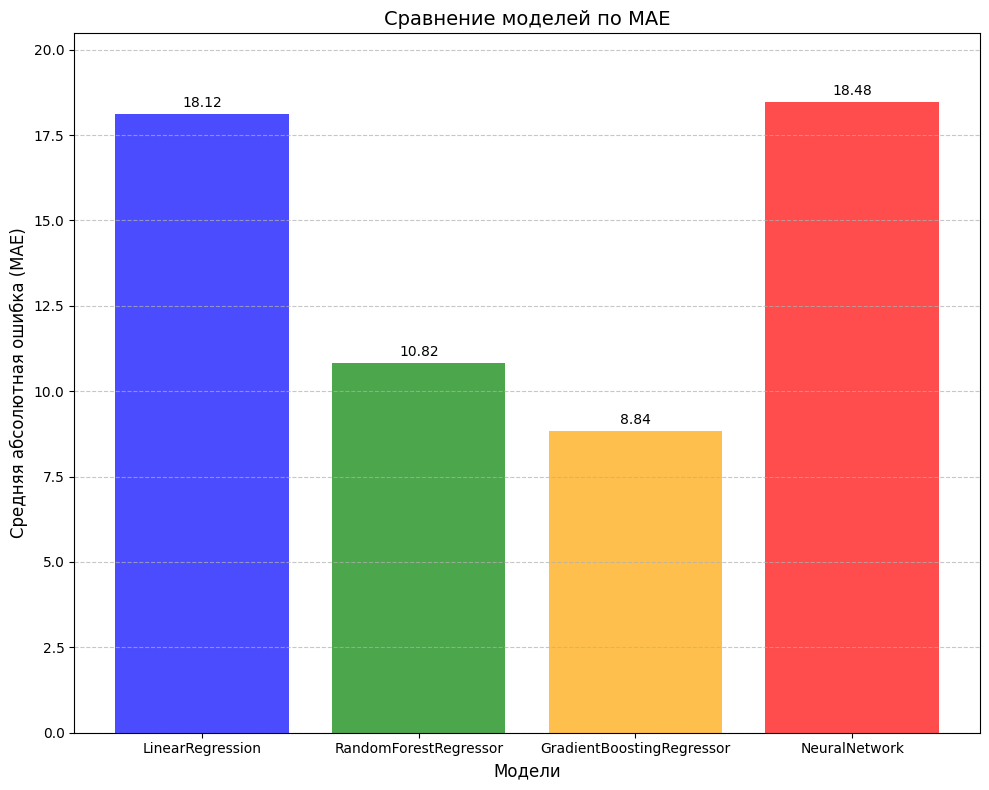

In [ ]:
import matplotlib.pyplot as plt

lr_mae_1 = 18.1226
rf_mae_1 = 10.8214
gbr_mae_1 = 8.8361
nn_mae_1 = 18.4788

models = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'NeuralNetwork']
mae_values = [lr_mae_1, rf_mae_1, gbr_mae_1, nn_mae_1]

plt.figure(figsize=(10, 8))
plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

plt.title('Сравнение моделей по MAE', fontsize=14)
plt.ylabel('Средняя абсолютная ошибка (MAE)', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, max(mae_values) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mae_values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Лучшей оказалась модель **GradientBoostingRegressor**. Также неплохо относительно других показала себя модель **RandomForestRegressor**.

Теперь сравним все модели по MSE и RMSE, построив графики.

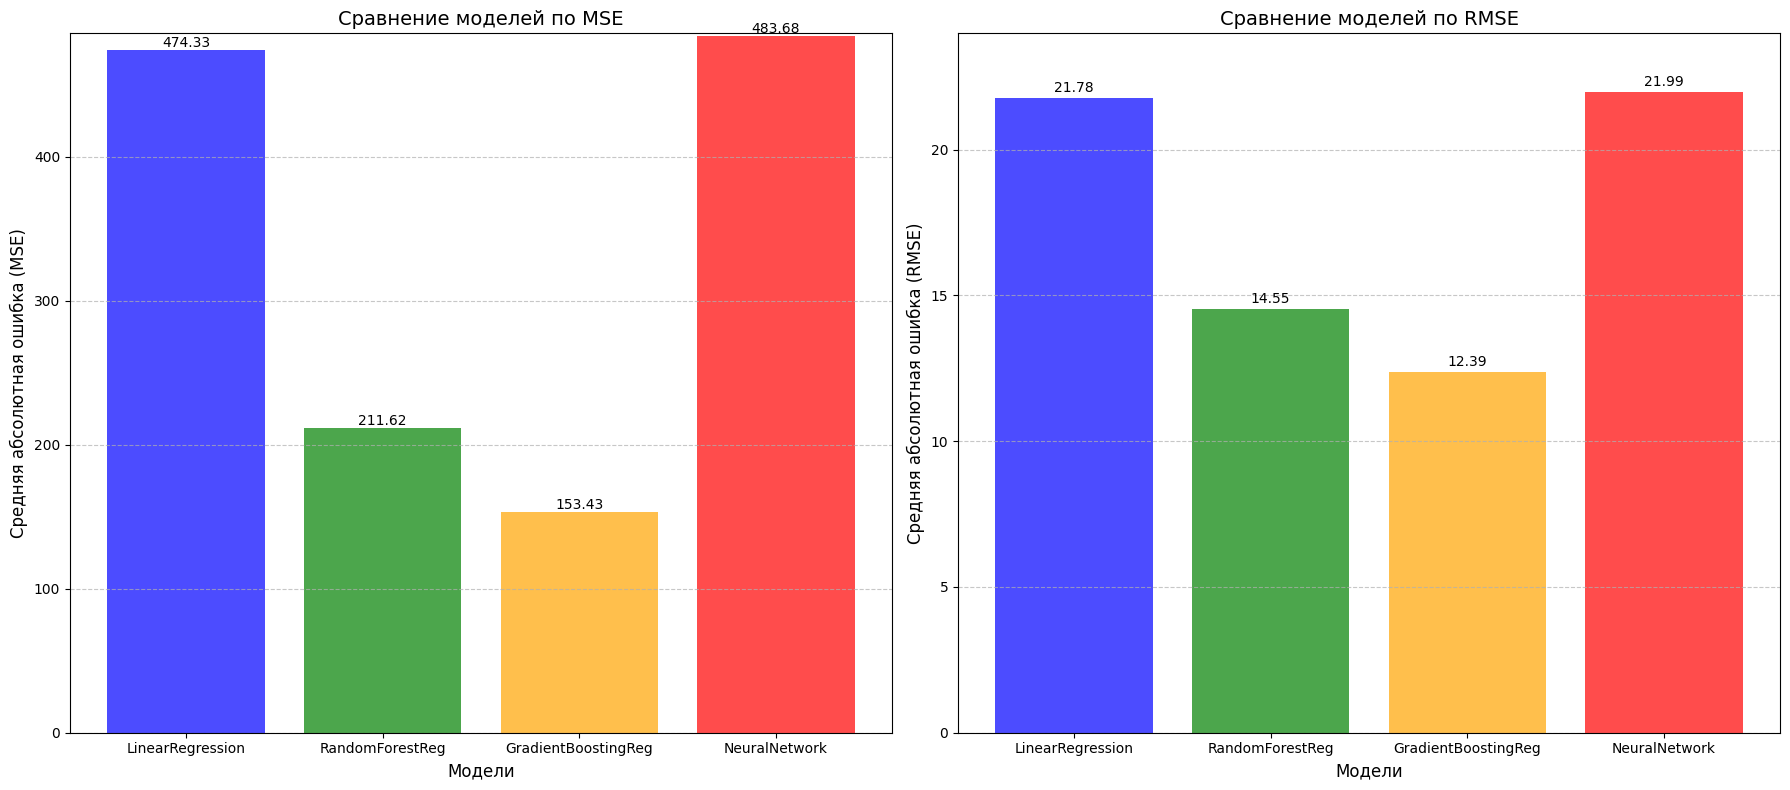

In [ ]:
import matplotlib.pyplot as plt

lr_mse_1 = 474.3265
rf_mse_1 = 211.6248
gbr_mse_1 = 153.4265
nn_mse_1 = 483.6837

models = ['LinearRegression', 'RandomForestReg', 'GradientBoostingReg', 'NeuralNetwork']
mse_values = [lr_mse_1, rf_mse_1, gbr_mse_1, nn_mse_1]

lr_rmse_1 = 21.7790
rf_rmse_1 = 14.5470
gbr_rmse_1 = 12.3865
nn_rmse_1 = 21.9926

rmse_values = [lr_rmse_1, rf_rmse_1, gbr_rmse_1, nn_rmse_1]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].bar(models, mse_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[0].set_title('Сравнение моделей по MSE', fontsize=14)
axes[0].set_ylabel('Средняя абсолютная ошибка (MSE)', fontsize=12)
axes[0].set_xlabel('Модели', fontsize=12)
axes[0].set_ylim(0, max(mse_values) + 2)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mse_values):
    axes[0].text(i, v + 2, f'{v:.2f}', ha='center', fontsize=10)

axes[1].bar(models, rmse_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[1].set_title('Сравнение моделей по RMSE', fontsize=14)
axes[1].set_ylabel('Средняя абсолютная ошибка (RMSE)', fontsize=12)
axes[1].set_xlabel('Модели', fontsize=12)
axes[1].set_ylim(0, max(rmse_values) + 2)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_values):
    axes[1].text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Лучшей оказалась модель **GradientBoostingRegressor**. Также неплохо относительно других показала себя модель **RandomForestRegressor**.

Сравним модели по R2.

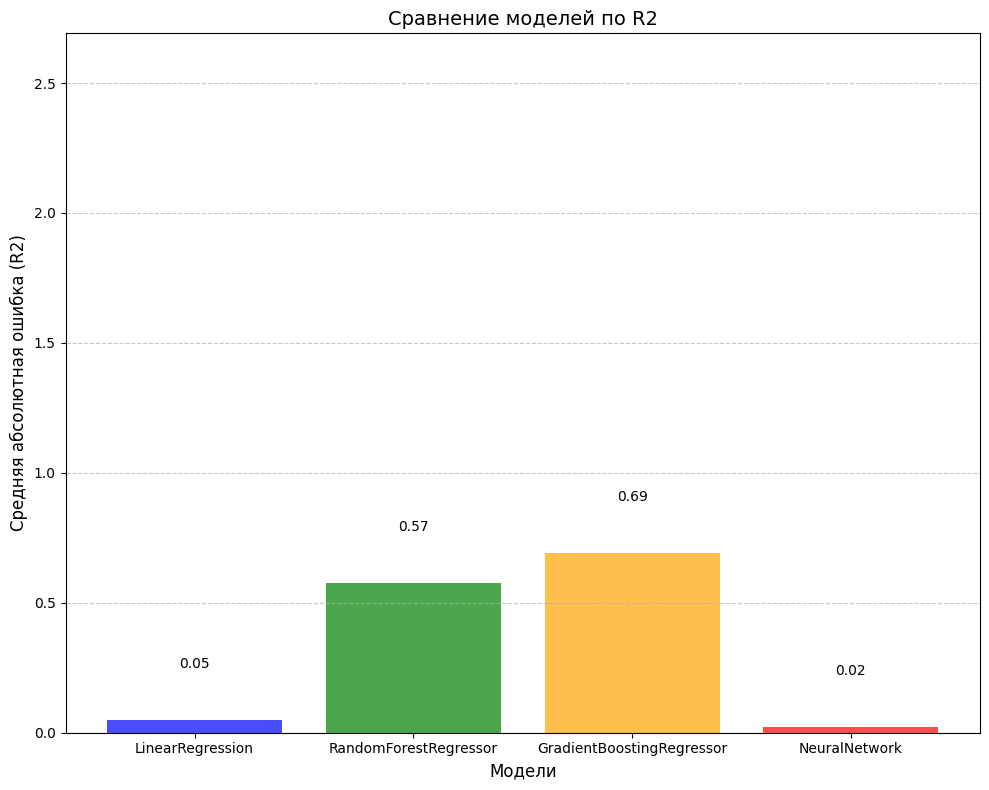

In [ ]:
import matplotlib.pyplot as plt

lr_r2_1 = 0.0472
rf_r2_1 = 0.5749
gbr_r2_1 = 0.6913
nn_r2_1 = 0.0217

models = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'NeuralNetwork']
mae_values = [lr_r2_1, rf_r2_1, gbr_r2_1, nn_r2_1]

plt.figure(figsize=(10, 8))
plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

plt.title('Сравнение моделей по R2', fontsize=14)
plt.ylabel('Средняя абсолютная ошибка (R2)', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, max(mae_values) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mae_values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Лучшей оказалась модель **GradientBoostingRegressor**. Также неплохо относительно других показала себя модель **RandomForestRegressor**.

Так как до этого мы уже запускали модели, делая кросс-валидацию с 5 фолдами, то теперь запустим лучшую модель на тестовых данных и убедимся что метрики будут примерно такие же.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_params = {'n_estimators': 412, 'learning_rate': 0.05082104077009736, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 10, 'subsample': 0.9806446663118171, 'max_features': None}
gbr = GradientBoostingRegressor(**best_params)

gbr.fit(X_train, Y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_test, y_pred)
r2_score = r2 = r2_score(Y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2_score}')

MSE: 137.59943118374423
RMSE: 11.730278393275423
MAE: 8.365521339527664
R^2: 0.7226318264420772


Как мы видим, значения ошибок и R2 близко к тому, что мы видели до этого, что является относительно хорошим показателем, но все зависит от контекста задачи для которой будет использоваться модель.

# Вывод

По итогу мы получили среднюю абсолютную ошибку MAE около 9, MSE около 150, а R2 примерно 0,7. Для наших данных это хороший результат, учитывая, что популярность треков, измеряемая от 0 до 100, зависит от множества факторов, не учтенных в текущем наборе данных. Например, такие как влияние социальных медиа, рекламных кампаний, особенностей музыкальных платформ и текущих трендов.

Если же полученные значения ошибок нас не уcтраивают и нам нужно уменьшить их, то для этого есть несколько опций:

*   Попробовать создать другие параметры на основе имеющихся, возможно с ними результат будет лучше.
*   Попробовать еще улучшить модели, подобрав другие гиперпараметры, либо скомбинировать несколько моделей через ансамблирование.
*   Добавить внешние признаки. Данные, такие как активность исполнителей в соцсетях, рекламные кампании, время выхода трека, особенности алгоритмов музыкальных площадок, могут значительно повысить точность модели.



С помощью описанных выше средств, можно будет добиться снижения ошибок и увеличения коэффициента детерминации, сделав предсказания более точными, а также учитывать большее количество факторов, которые влияют на популярность.



---



---



# Эксперимент

Посмотрим сколько в датасете строк с 0 значением таргета.

In [ ]:
data_exp[data_exp['popularity'] == 0].shape[0]

16019

7% данных имеют 0 таргет, удалим эти данные и посмотрим как будет предсказывать модель.

In [ ]:
data_exp2 = data_exp[data_exp['popularity'] != 0]
data_exp2[data_exp2['popularity'] == 0].shape[0]

0

Разделим данные на обучающую и тестовую выборку.

In [ ]:
from sklearn.model_selection import train_test_split

X = data_exp2.drop('popularity', axis = 1)
Y = data_exp2['popularity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Удалили строки с нулевым таргетом, проверим как предсказывает популярность модель градиентного бустинга.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

best_params = {'n_estimators': 412, 'learning_rate': 0.05082104077009736, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 10, 'subsample': 0.9806446663118171, 'max_features': None}
gbr = GradientBoostingRegressor(**best_params)

gbr.fit(X_train, Y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 121.41391404894905
RMSE: 11.018798212552449
MAE: 7.893700581623777
R^2: 0.6746494158975533


Теперь сравним модели по MSE и R2.

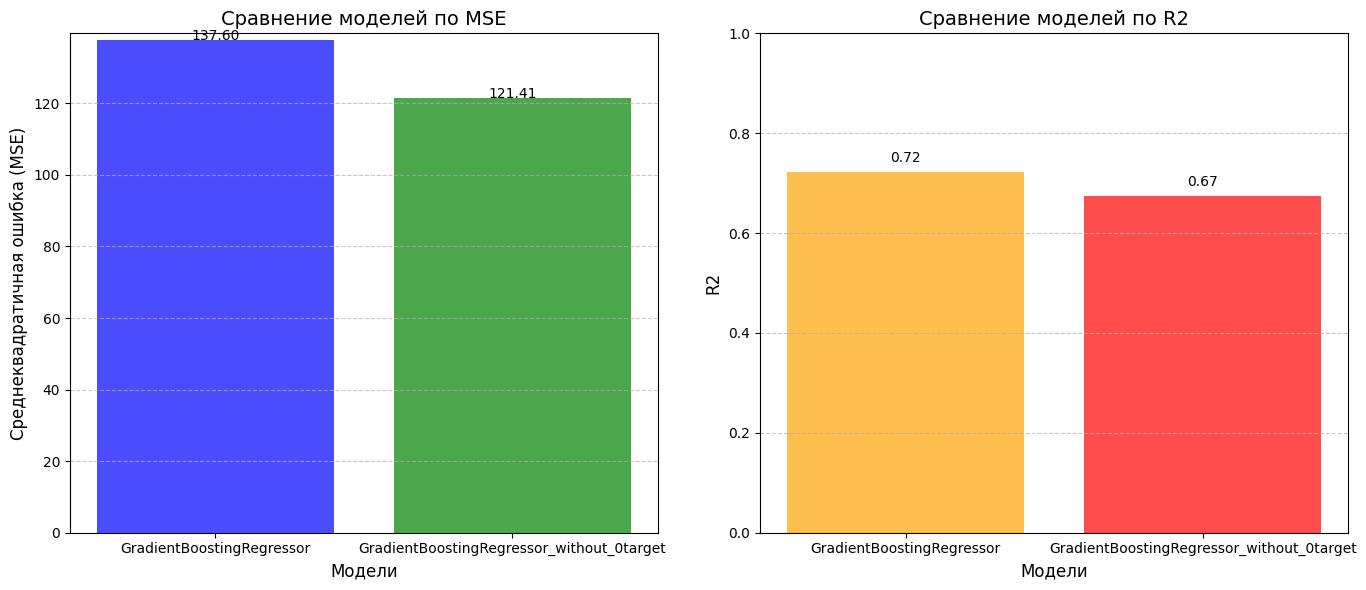

In [ ]:
import matplotlib.pyplot as plt

mse_1 = 137.59943118374423
mse_2 = 121.41391404894905

r2_1 = 0.7226318264420772
r2_2 = 0.6746494158975533

models = ['GradientBoostingRegressor', 'GradientBoostingRegressor_without_0target']
mse_values = [mse_1, mse_2]
r2_values = [r2_1, r2_2]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green'], alpha=0.7)
plt.title('Сравнение моделей по MSE', fontsize=14)
plt.ylabel('Среднеквадратичная ошибка (MSE)', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, max(mse_values) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mse_values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['orange', 'red'], alpha=0.7)
plt.title('Сравнение моделей по R2', fontsize=14)
plt.ylabel('R2', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Как мы видим, модель которая обучалась на данных без 0 таргета, выдает меньшее значение ошибки, но проигрывает по R2 метрике. Так что решить, какая из ситуаций лучше или хуже достаточно сложно, так как все зависит от того, какая метрика для нас более важна.

Теперь добавим кросс-валидацию и посмотрим какие будут значения метрик.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

best_params = {'n_estimators': 412, 'learning_rate': 0.05082104077009736, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 10, 'subsample': 0.9806446663118171, 'max_features': None}
gbr = GradientBoostingRegressor(**best_params)

mae_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse_scores_gbr = np.sqrt(mse_scores_gbr)
r2_scores_gbr = cross_val_score(gbr, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)

gbr_mae = mae_scores_gbr.mean()
gbr_mse = mse_scores_gbr.mean()
gbr_rmse = rmse_scores_gbr.mean()
gbr_r2 = r2_scores_gbr.mean()

print(f"Средняя MAE на 5 фолдах: {gbr_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {gbr_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {gbr_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {gbr_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_gbr.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_gbr.std():.4f}")

Средняя MAE на 5 фолдах: 8.2368
Средняя MSE на 5 фолдах: 131.1747
Средняя RMSE на 5 фолдах: 11.4530
Средний R2 на 5 фолдах: 0.6420
Стандартное отклонение MAE: 0.0317
Стандартное отклонение MSE: 1.1733
Стандартное отклонение RMSE: 0.0512
Стандартное отклонение R2: 0.0061


Как мы видим, полученные значения схожи с теми, что мы получили без кросс-валидации.

Сравним модели с кросс-валидацией по MSE и R2.

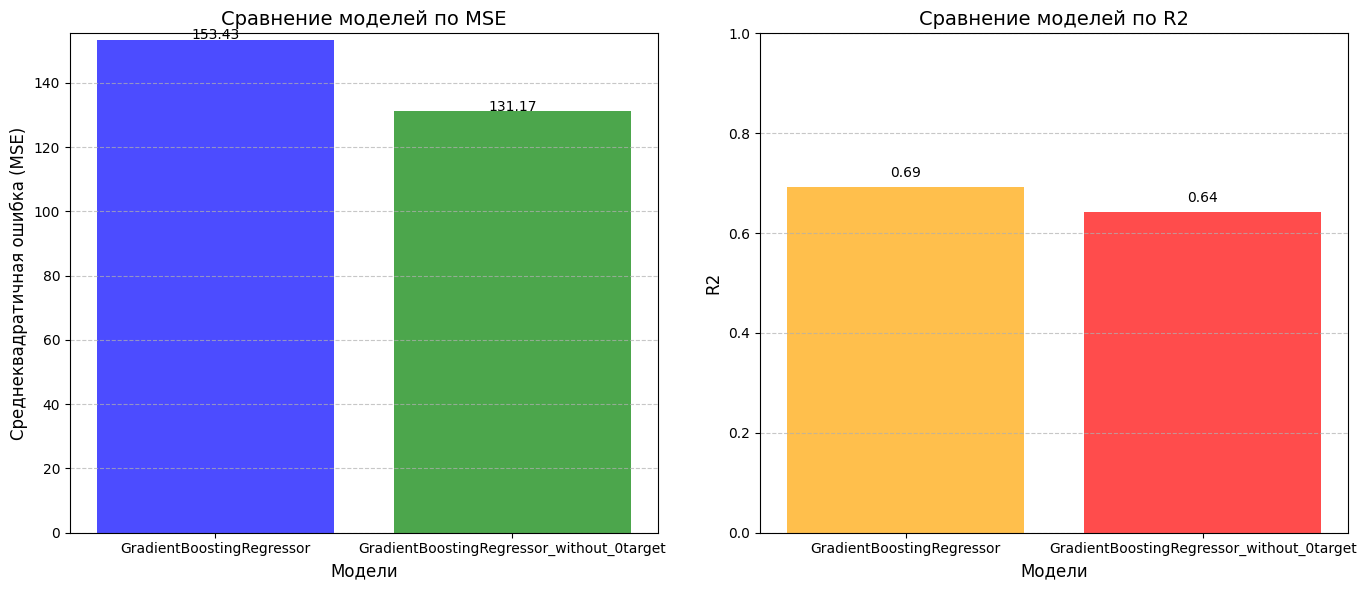

In [ ]:
import matplotlib.pyplot as plt

mse_1 = 153.4265
mse_2 = 131.1747

r2_1 = 0.6913
r2_2 = 0.6420

models = ['GradientBoostingRegressor', 'GradientBoostingRegressor_without_0target']
mse_values = [mse_1, mse_2]
r2_values = [r2_1, r2_2]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green'], alpha=0.7)
plt.title('Сравнение моделей по MSE', fontsize=14)
plt.ylabel('Среднеквадратичная ошибка (MSE)', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, max(mse_values) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mse_values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['orange', 'red'], alpha=0.7)
plt.title('Сравнение моделей по R2', fontsize=14)
plt.ylabel('R2', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

По графикам видно, что ситуация такая же, как и без кросс-валидации, так что решение на каких данных лучше обучать модель зависит от задачи и от важности определенной метрики.